In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.ensemble import *

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

import xgboost


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA


from sklearn.metrics import *

In [45]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''
sns.set_style("white")

# Data Import 

In [46]:
train_df_raw = pd.read_csv('Project2_Train.csv')
display(train_df_raw.head())

test_df_raw = pd.read_csv('Project2_Test.csv')
display(test_df_raw.head())

,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,VehicleDamage,Premium,Vintage,Response,Mystery
0,1,319654,Male,22,46,< 1 Year,Yes,29719,79,0,M3
1,2,298528,Female,40,28,1-2 Year,Yes,29645,99,0,M20
2,3,120858,Male,25,28,1-2 Year,Yes,35996,266,1,M3
3,4,234326,Female,25,29,< 1 Year,No,56899,25,0,M20
4,5,372307,Female,70,28,1-2 Year,No,47452,189,0,M17


,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,Damage,Premium,Vintage,Response,Mystery
0,1,121588,Female,24,28,< 1 Year,Yes,2630,271,0,M1
1,2,44234,Male,23,28,1-2 Year,Yes,40523,244,0,M20
2,3,65903,Male,51,28,1-2 Year,Yes,40951,33,0,M7
3,4,264705,Female,31,46,< 1 Year,Yes,42505,191,0,M9
4,5,364309,Male,51,46,1-2 Year,Yes,38232,151,1,M2


In [47]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   id             10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   Age            10000 non-null  int64 
 4   Region_Code    10000 non-null  int64 
 5   Age.1          10000 non-null  object
 6   VehicleDamage  10000 non-null  object
 7   Premium        10000 non-null  int64 
 8   Vintage        10000 non-null  int64 
 9   Response       10000 non-null  int64 
 10  Mystery        10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB


In [48]:
train_df = train_df_raw.copy()

# Make male = 1 female = 0 
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train_df['VehicleDamage'] = train_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train_df = pd.get_dummies(train_df, columns=['Age.1'])
train_df = pd.get_dummies(train_df, columns=['Region_Code'])


# Drop mystery 
train_df = train_df.drop('Mystery', axis=1)
train_df = train_df.drop('Unnamed: 0', axis=1)

train_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [49]:
test_df = test_df_raw.copy()

# Make male = 1 female = 0 
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
test_df['Damage'] = test_df['Damage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
test_df = pd.get_dummies(test_df, columns=['Age.1'])
test_df = pd.get_dummies(test_df, columns=['Region_Code'])

# Drop mystery 
test_df = test_df.drop('Mystery', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

test_df

,id,Gender,Age,Damage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,121588,0,24,1,2630,271,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,44234,1,23,1,40523,244,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,65903,1,51,1,40951,33,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,264705,0,31,1,42505,191,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,364309,1,51,1,38232,151,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,123293,1,49,0,33720,161,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9996,110877,1,43,1,23176,171,1,1,0,0,0,0,0,0,0,0,0,0,1,0
9997,207348,1,36,0,2630,16,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9998,89084,1,36,1,26275,230,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
def data_generation(df, features, target):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp[target]
    X = df_temp.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])


#--------------------------------------------------------------------------------------------------


def classification_stats(X_train, y_train, model_used, model_name):
    
    y_pred = model_used.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    gmeans = (tpr * (1-fpr))**.5
    ix = np.argmax(gmeans)

    y_pred = (model_used.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

    print("The Training Accuracy is: ", model_used.score(X_train, y_train))
    print("The Testing Accuracy is: ", model_used.score(X_test, y_test))
    print(classification_report(y_test, y_pred, target_names=['Bad Response', 'Good Response']))

    #--------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(16,9))
    cm  =confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

    fig = ConfusionMatrixDisplay(cm_norm).plot()

    plt.savefig('temp.png', transparent=True, dpi=600)
    plt.show()

    #--------------------------------------------------------------------------------------------------
    # Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    #--------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(16,9))
    fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

    #--------------------------------------------------------------------------------------------------
    # Test performance
    y_pred = model_used.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

    #--------------------------------------------------------------------------------------------------
    # Train performance
    y_pred = model_used.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    auc = roc_auc_score(y_train, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


    gmeans = (tpr * (1-fpr))**.5
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


    #--------------------------------------------------------------------------------------------------
    plt.legend()
    fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.suptitle(model_name, fontsize = 24)
    plt.savefig('temp.png', transparent=True)
    plt.show() 
    

#--------------------------------------------------------------------------------------------------

def PRAUC_generator(X_train, y_train, model_used, model_name):
    # Training Set
    y_pred_proba = model_used.predict_proba(X_train)[:, 1]
    precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
    average_precision = average_precision_score(y_train, y_pred_proba)

    plt.figure(figsize = (8,6))
    plt.plot(recall, precision, label = 'PRAUC = %0.3f' % average_precision)
    plt.legend(loc = 'upper right')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.title(f'{model_name} Precision-Recall Curve [Training]\n Baseline PRAUC = 0.264')
    plt.show()
    
    
def feature_selection_results(X_train, model_used, model_name):
    importance = model_used.named_steps["mdl"].coef_[0].tolist()
    f = X_train.columns
    temp = pd.DataFrame({'features':f, 'values':importance})
    temp = temp.sort_values('values', ascending=False)

    display(temp)

    fig = plt.figure(figsize=(16,9))
    plt.suptitle(f'{model_name} Importances', fontsize = 24)
    sns.barplot(data=temp, x='values', y='features')
    plt.show()

# Choice of Performance Metric<a id="section5"></a>

- **TP**: Correctly detecting a popular song [Highest Significance]
- **FP**: Wrongly detected a popular song [High Significance]
- **FN**: Fail to detect a popular song [Moderate Significance]
- **TN**: Correctly detecting an unpopular song [Low Significance]


Performance metric should prioritise maximising TP and minimising FP. If possible, FN should be minimised as well. 

Based on the above classfication of significance, the **Precision score (TP/TP+FP)** should be as high as possible, correctly **predicting more positives** and **falsely predicting less positives**. 

However, we should not only use Precision as the evaluation metric as FNs should are of moderate significance. In order to **minimise FNs, the Recall score should be as higher as possible**.

In order to maximise Recall and Precision, **Precision-Recall Area Under Curve (PR AUC)** should be the main evaluation metric.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

https://glassboxmedicine.com/2019/03/02/measuring-performance-auprcz


# Logistic Regression 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.860909090909091
               precision    recall  f1-score   support

 Bad Response       0.98      0.63      0.76      2841
Good Response       0.29      0.93      0.44       459

     accuracy                           0.67      3300
    macro avg       0.63      0.78      0.60      3300
 weighted avg       0.89      0.67      0.72      3300



<Figure size 1152x648 with 0 Axes>

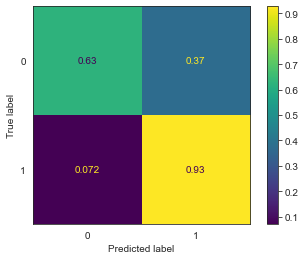

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.156160, G-Mean=0.772


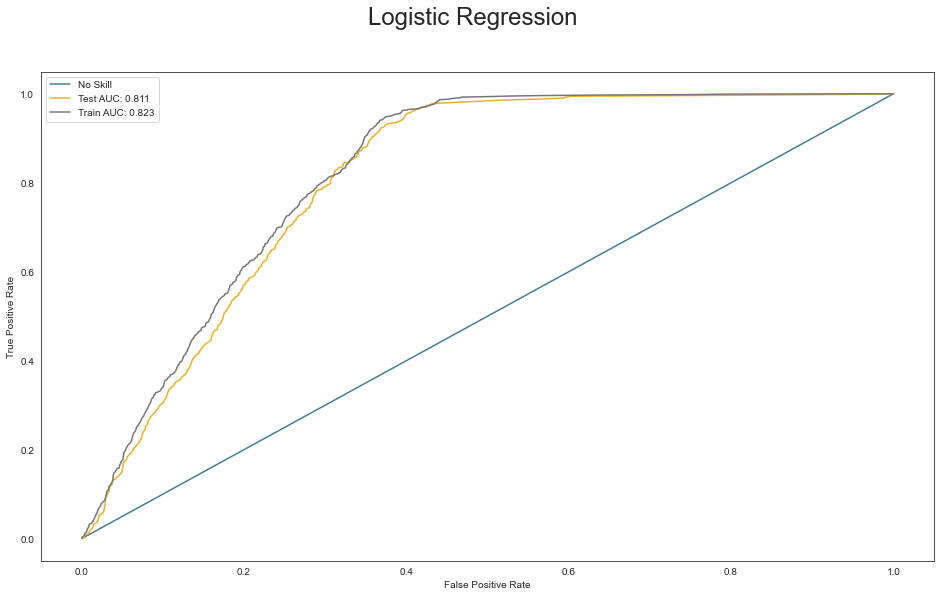

CPU times: user 2.43 s, sys: 164 ms, total: 2.59 s
Wall time: 1.33 s


In [103]:
%%time
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_test, y_train, y_test = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
logreg = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

classification_stats(X_train, y_train, logreg, 'Logistic Regression')

### PRAUC

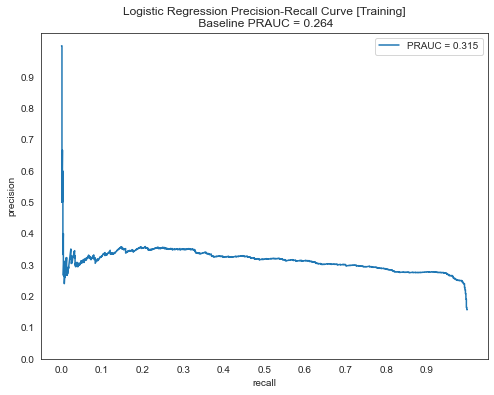

In [104]:
PRAUC_generator(X_train, y_train, logreg, 'Logistic Regression')

### Feature Selection

,features,values
2,VehicleDamage,2.105192
5,Age.1_1-2 Year,0.207786
7,Age.1_> 2 Years,0.127756
15,Region_Code_41,0.106727
12,Region_Code_28,0.092953
13,Region_Code_29,0.092140
10,Region_Code_11,0.077941
14,Region_Code_30,0.026846
0,Gender,0.004407
4,Vintage,0.000458


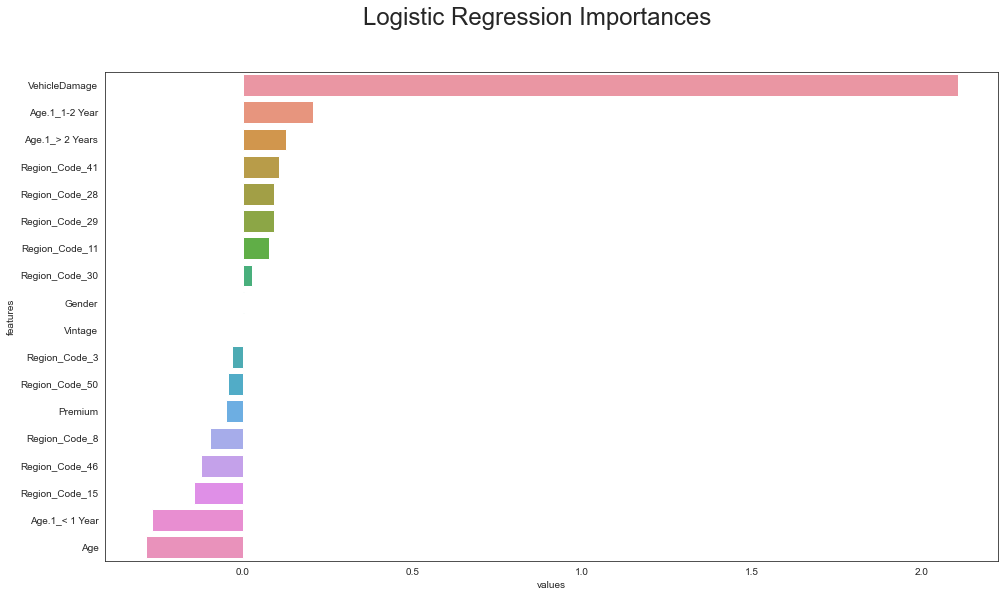

In [53]:
feature_selection_results(X_train, logreg, 'Logistic Regression')

<br>

<br>

# Choosing a Complex Model

In [54]:
%%time
results = []
names = []

#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('Logistic', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostClassifier()))
models.append(('Gradient boosting', GradientBoostingClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
# VOTING
logistic = LogisticRegression()
svc = SVC()
svm = SVC(kernel = 'rbf')
mlp = MLPClassifier(alpha=1, max_iter=1000)

list_models = [('logistic', logistic),
               ('svc', svc), 
               ('svm', svm),
               ('mlp', mlp)
              ]
models.append(('Voting regressor', VotingClassifier(estimators=list_models)))

for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'Accuracy', 'Accuracy_std'])
mdl_performance = mdl_performance.sort_values('Accuracy', ascending=False)
mdl_performance

CPU times: user 60.1 ms, sys: 9.97 ms, total: 70.1 ms
Wall time: 7.29 s


,model,Accuracy,Accuracy_std
0,Logistic,0.870746,0.000000
4,Support Vector Classifier,0.870597,0.000149
5,Support Vector Machines,0.870597,0.000149
6,MLP,0.870597,0.000149
10,Voting regressor,0.870597,0.000149
7,Ada boost,0.867612,0.001343
8,Gradient boosting,0.867015,0.000149
1,Random Forest,0.855522,0.000299
9,Bagging classifier,0.851194,0.000149
3,K Neigbor Classifier,0.845522,0.002537


# Gradient Boost No Hyperparameter Tuning

The Training Accuracy is:  0.8749253731343284
The Testing Accuracy is:  0.8584848484848485
               precision    recall  f1-score   support

 Bad Response       0.96      0.70      0.81      2841
Good Response       0.31      0.83      0.45       459

     accuracy                           0.72      3300
    macro avg       0.64      0.77      0.63      3300
 weighted avg       0.87      0.72      0.76      3300



<Figure size 1152x648 with 0 Axes>

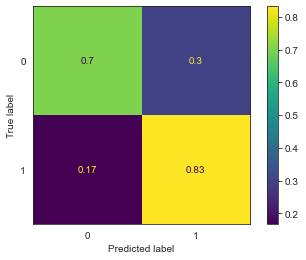

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.188931, G-Mean=0.806


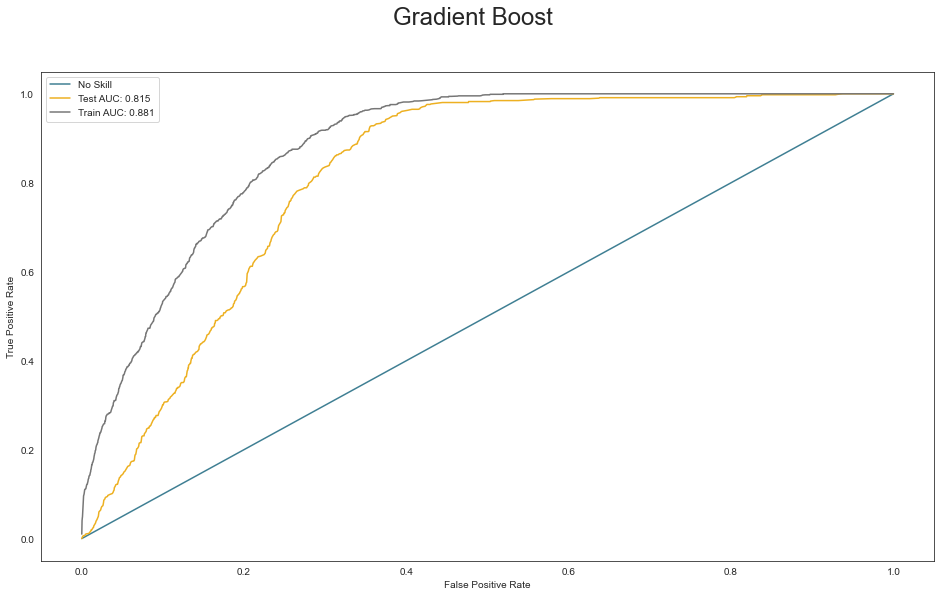

In [55]:
grad_boost = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost.fit(X_train, y_train)

classification_stats(X_train, y_train, grad_boost, 'Gradient Boost')

# Gradient Boost With Hyperparameter tuning 

In [71]:
%%time
# Hyper parameter tuning
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__max_depth":[1,3,5,7],
    "mdl__learning_rate":[0.01]
}

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

grad_boost_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(grad_boost_GS.best_params_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Model Best Params: 
{'mdl__learning_rate': 0.01, 'mdl__max_depth': 1, 'mdl__n_estimators': 5}
CPU times: user 506 ms, sys: 151 ms, total: 657 ms
Wall time: 1min 14s


In [72]:
# parameters to hyper tune
print('Gradient Boost Params: ')
grad_boost_GS.get_params()

Gradient Boost Params: 


{'cv': 10,
 'error_score': 0,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('mdl', GradientBoostingClassifier())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__mdl': GradientBoostingClassifier(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__mdl__ccp_alpha': 0.0,
 'estimator__mdl__criterion': 'friedman_mse',
 'estimator__mdl__init': None,
 'estimator__mdl__learning_rate': 0.1,
 'estimator__mdl__loss': 'deviance',
 'estimator__mdl__max_depth': 3,
 'estimator__mdl__max_features': None,
 'estimator__mdl__max_leaf_nodes': None,
 'estimator__mdl__min_impurity_decrease': 0.0,
 'estimator__mdl__min_impurity_split': None,
 'estimator__mdl__min_samples_leaf': 1,
 'estimator__mdl__min_samples_split': 2,
 'estimator__mdl__min_weight_fraction_leaf': 0.0,
 'estimator__mdl__n_estimators': 100,
 'estimator__mdl__n_iter_no_change': None,
 'estimator__

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.860909090909091
               precision    recall  f1-score   support

 Bad Response       0.99      0.56      0.72      2841
Good Response       0.26      0.98      0.42       459

     accuracy                           0.62      3300
    macro avg       0.63      0.77      0.57      3300
 weighted avg       0.89      0.62      0.67      3300



<Figure size 1152x648 with 0 Axes>

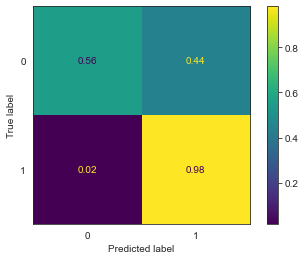

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.135350, G-Mean=0.744


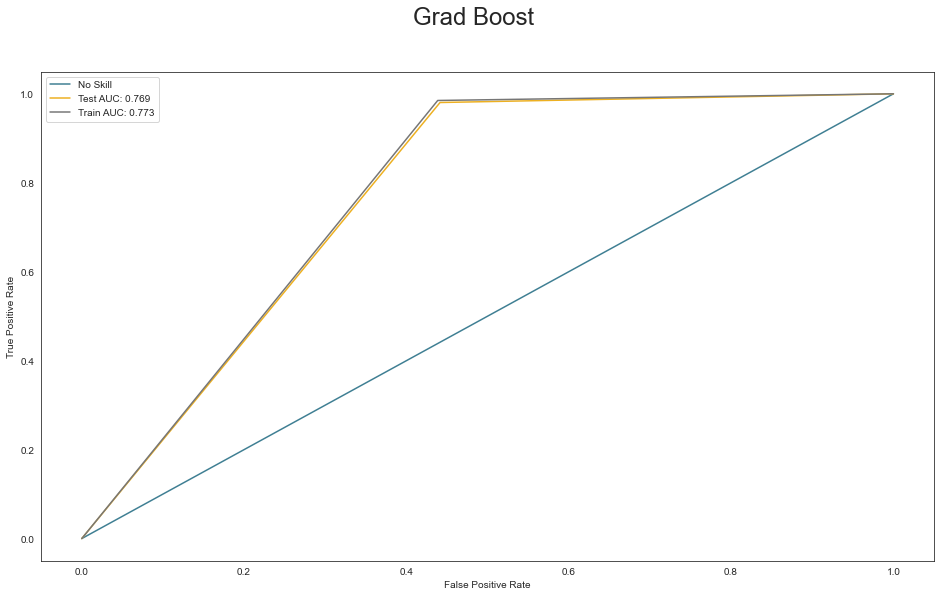

In [73]:
classification_stats(X_train, y_train, grad_boost_GS, 'Gradient Boost')

### PRAUC

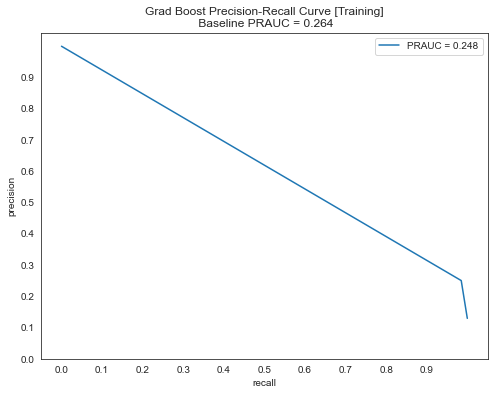

In [74]:
PRAUC_generator(X_train, y_train, grad_boost_GS, 'Grad Boost')

### Feature Importance 

,features,values
2,VehicleDamage,1.0
0,Gender,0.0
10,Region_Code_8,0.0
17,Region_Code_46,0.0
16,Region_Code_41,0.0
15,Region_Code_30,0.0
14,Region_Code_29,0.0
13,Region_Code_28,0.0
12,Region_Code_15,0.0
11,Region_Code_11,0.0


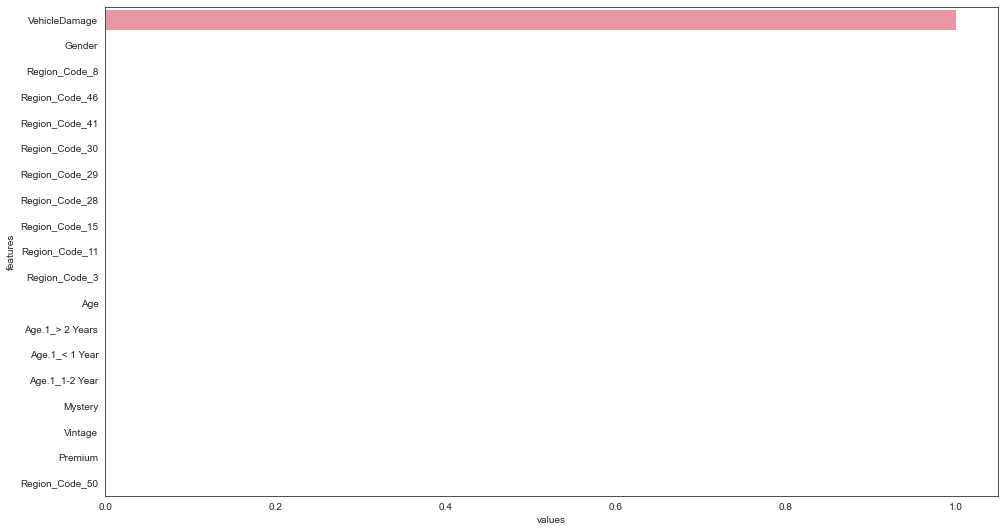

In [76]:
importance = grad_boost_GS.best_estimator_.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features')
plt.show()

# Part 2: Mystery

### One Hot

In [78]:
train2_df = train_df_raw.copy()

# Make male = 1 female = 0 
train2_df['Gender'] = train2_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train2_df['VehicleDamage'] = train2_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train2_df = pd.get_dummies(train2_df, columns=['Age.1'])
train2_df = pd.get_dummies(train2_df, columns=['Region_Code'])
train2_df = pd.get_dummies(train2_df, columns=['Mystery'])

# Drop mystery 
train2_df = train2_df.drop('Unnamed: 0', axis=1)

train2_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,...,Mystery_M19,Mystery_M2,Mystery_M20,Mystery_M3,Mystery_M4,Mystery_M5,Mystery_M6,Mystery_M7,Mystery_M8,Mystery_M9
0,319654,1,22,1,29719,79,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,298528,0,40,1,29645,99,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,369037,0,46,0,2630,286,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The Training Accuracy is:  0.9998507462686567
The Testing Accuracy is:  0.853030303030303
               precision    recall  f1-score   support

 Bad Response       0.87      0.98      0.92      2841
Good Response       0.35      0.08      0.13       459

     accuracy                           0.85      3300
    macro avg       0.61      0.53      0.52      3300
 weighted avg       0.80      0.85      0.81      3300



<Figure size 1152x648 with 0 Axes>

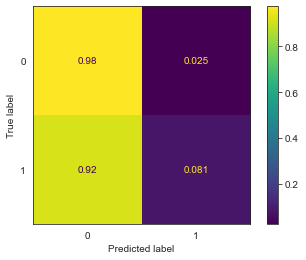

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.500000, G-Mean=1.000


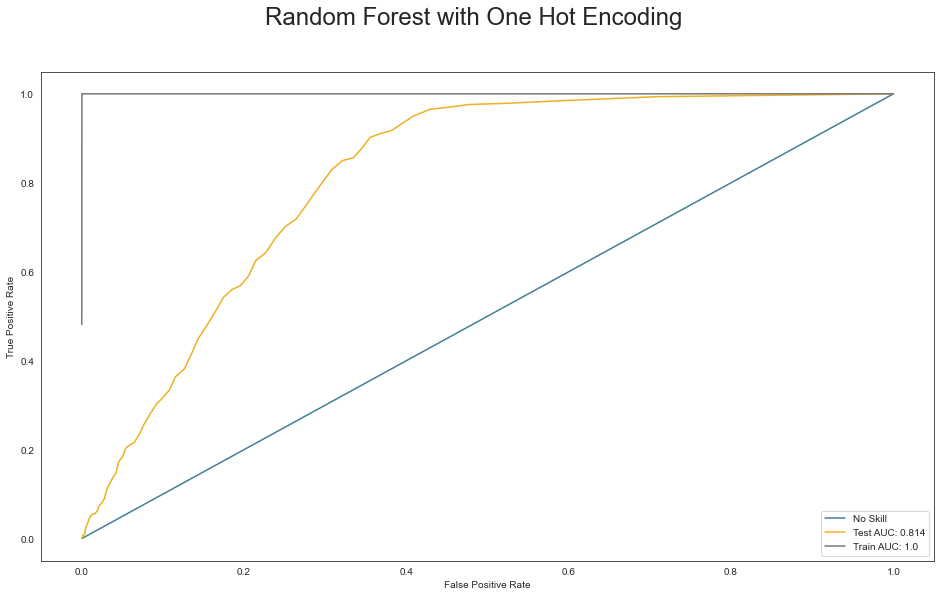

In [83]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response',
            'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years','Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28',
            'Region_Code_29', 'Region_Code_30', 'Region_Code_41', 'Region_Code_46',
            'Region_Code_50', 'Mystery_M1', 'Mystery_M10', 'Mystery_M11', 'Mystery_M12',
            'Mystery_M13', 'Mystery_M14', 'Mystery_M15', 'Mystery_M16', 'Mystery_M17',
            'Mystery_M18', 'Mystery_M19', 'Mystery_M2', 'Mystery_M20', 'Mystery_M3',
            'Mystery_M4','Mystery_M5', 'Mystery_M6', 'Mystery_M7', 'Mystery_M8', 'Mystery_M9']

X_train, X_test, y_train, y_test = data_generation(train2_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_one_hot = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_one_hot.fit(X_train, y_train)

classification_stats(X_train, y_train, random_forest_one_hot, 'Random Forest with One Hot Encoding')

,features,values
4,Vintage,0.198470
1,Age,0.187223
3,Premium,0.185941
2,VehicleDamage,0.107773
0,Gender,0.028890
12,Region_Code_28,0.016534
5,Age.1_1-2 Year,0.014758
6,Age.1_< 1 Year,0.014537
25,Mystery_M16,0.011174
18,Mystery_M1,0.009864


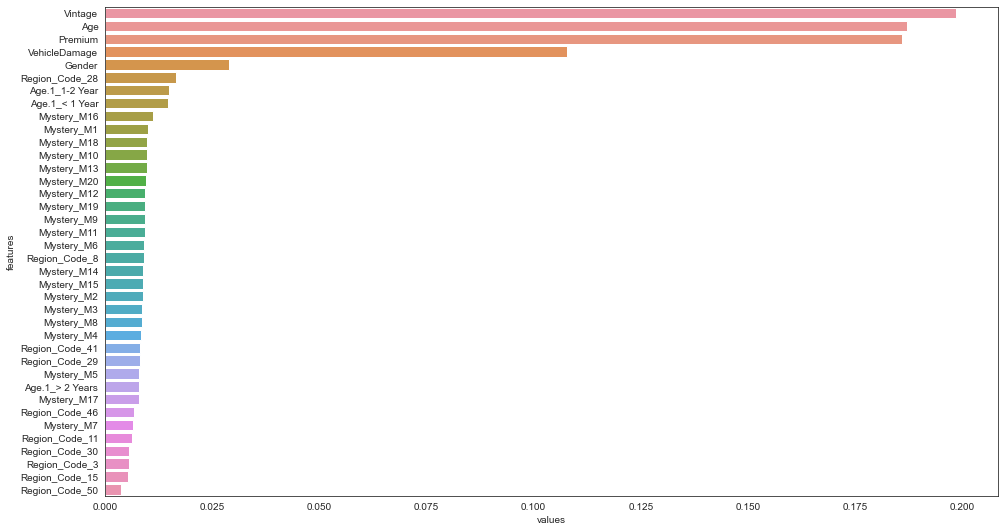

In [81]:
importance = random_forest_one_hot.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features')
plt.show()

### Integer Encoding

In [93]:
train3_df = train_df_raw.copy()

# Make male = 1 female = 0 
train3_df['Gender'] = train3_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train3_df['VehicleDamage'] = train3_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train3_df = pd.get_dummies(train3_df, columns=['Age.1'])
train3_df = pd.get_dummies(train3_df, columns=['Region_Code'])
train3_df['Mystery'] = train3_df['Mystery'].apply(lambda x: int(x[1:]))

# Drop mystery 
train3_df = train3_df.drop('Unnamed: 0', axis=1)

train3_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Mystery,Age.1_1-2 Year,Age.1_< 1 Year,...,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,3,0,1,...,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,20,1,0,...,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,3,1,0,...,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,20,0,1,...,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,17,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,3,0,1,...,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,13,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,4,1,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,16,0,1,...,0,0,0,0,0,0,1,0,0,0


In [94]:
train3_df.columns

Index(['id', 'Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
       'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
       'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
       'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
       'Region_Code_41', 'Region_Code_46', 'Region_Code_50'],
      dtype='object')

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8536363636363636
               precision    recall  f1-score   support

 Bad Response       0.87      0.98      0.92      2841
Good Response       0.45      0.08      0.14       459

     accuracy                           0.86      3300
    macro avg       0.66      0.53      0.53      3300
 weighted avg       0.81      0.86      0.81      3300



<Figure size 1152x648 with 0 Axes>

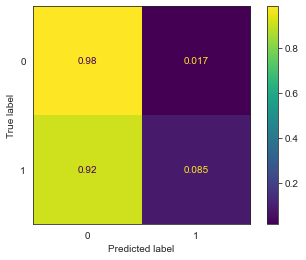

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.540000, G-Mean=1.000


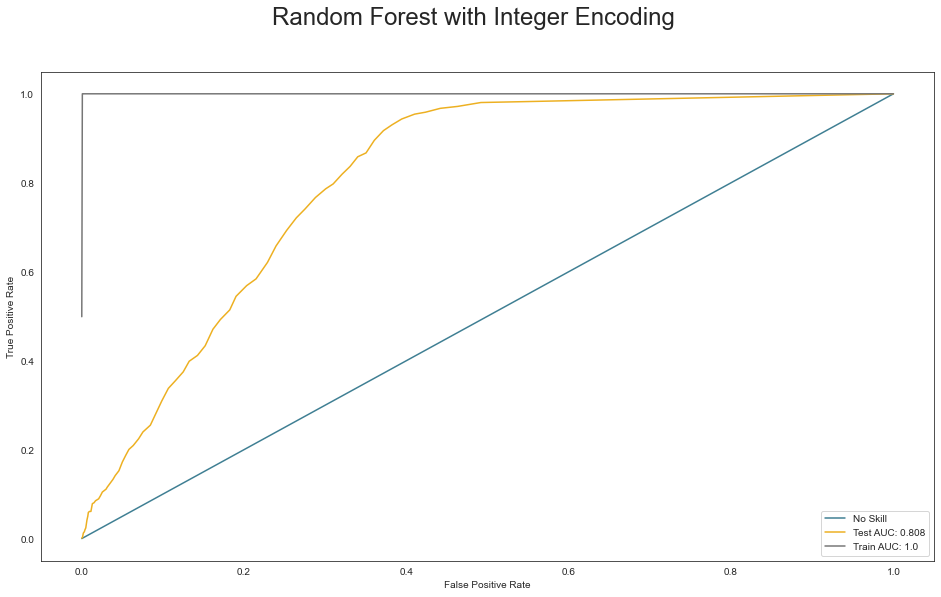

In [98]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
            'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
            'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
            'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_test, y_train, y_test = data_generation(train3_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_integer = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_integer.fit(X_train, y_train)

classification_stats(X_train, y_train, random_forest_integer, 'Random Forest with Integer Encoding')

,features,values
4,Vintage,0.221315
3,Premium,0.202721
1,Age,0.200941
5,Mystery,0.142306
2,VehicleDamage,0.110658
0,Gender,0.025759
13,Region_Code_28,0.013619
7,Age.1_< 1 Year,0.013248
6,Age.1_1-2 Year,0.011267
10,Region_Code_8,0.008276


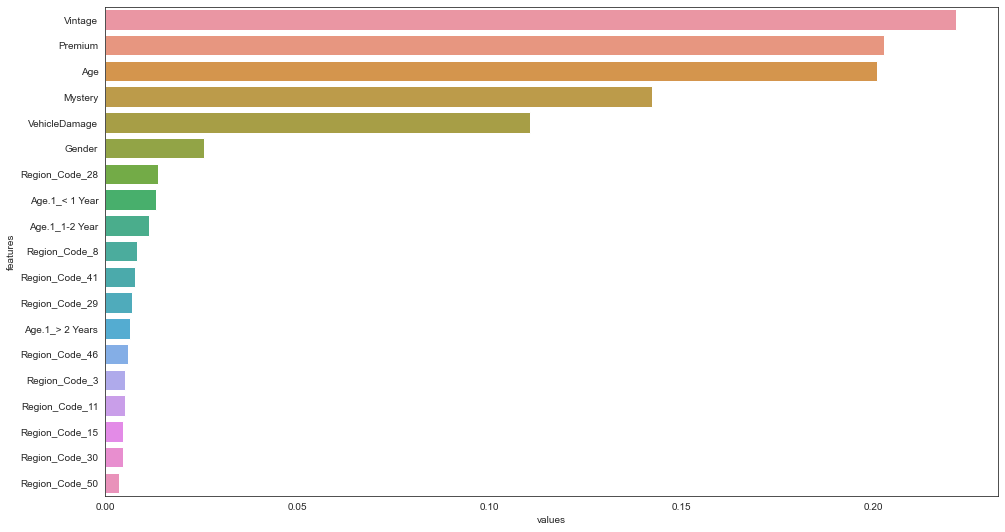

In [99]:
importance = random_forest_integer.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features')
plt.show()

# Benefit Structure 

In [105]:
def findProbabilityThreshold(tp, fp, fn, tn, model, thresholds, X_train, y_train):
    confusion_matrices = []

    for i in range(0, len(thresholds)):
        threshold = thresholds[i]
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
    
    benefits = []

    for j in range(0, len(thresholds)):
        cm = confusion_matrices[j]
        t_neg = cm[0, 0]
        f_pos = cm[0, 1]
        f_neg = cm[1, 0]
        t_pos = cm[1, 1]
        total = t_neg + f_pos + f_neg + t_pos

        cost_of_tp = tp
        cost_of_fn = fn
        cost_of_fp = fp
        cost_of_tn = tn

        benefit = (t_pos * cost_of_tp
                   + f_neg * cost_of_fn
                   + f_pos * cost_of_fp
                   + (t_pos + f_pos) * cost_of_tn)
        benefits.append(benefit)

    print("Probability Thresholds: ")
    print(thresholds)
    print("Benefits for each probability threshold: ")
    print(benefits)
    
    print("\nBest Probability Threshold & Benefit for " + type(model).__name__ + ":")

    print("Probability Threshold: " + str(thresholds[np.argmax(benefits)] * 100) + "%")
    print("Benefit: " + str(np.max(benefits)))
    
    return thresholds[np.argmax(benefits)]

### Part 1: 
- Promote to an interested customer + 10
- Miss an interested customer - 10
- Promote to an uninterested customer - 2
- Each promotion - 1

In [115]:
thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(10, -2, -10, -1,
                                          logreg,
                                          thresholds, X_train, y_train)

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[-4392, 165, 198, 198, 198, 198, 198, 198, 198, 204, 258, 273, 291, 307, 271, 339, 320, 226, 102, -23, -253, -351, -524, -706, -952, -1201, -1322, -1539, -1857, -2152, -2451, -2809, -3212, -3471, -3736, -3893, -4187, -4319, -4421, -4524, -4516, -4549, -4572, -4592, -4611, -4605, -4602, -4599, -4593, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -459

### Part 2:
- Promote to an interested customer + 100
- Miss an interested customer - 100
- Promote to an uninterested customer - 2
- Each promotion - 1

In [116]:
thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(100, -2, -100, -1,
                                          logreg,
                                          thresholds, X_train, y_train)

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[36918, 39855, 39888, 39888, 39888, 39888, 39888, 39888, 39888, 39894, 39948, 39423, 38901, 38017, 36361, 36249, 35510, 33616, 31152, 28507, 24137, 21519, 18286, 15044, 11018, 6989, 4528, 891, -3747, -8542, -13521, -19459, -25442, -29661, -33346, -35843, -39377, -41129, -42851, -44214, -44386, -44959, -45342, -45722, -45921, -45915, -45912, -45909, -45903, -45900, -45900, -45900, -45900, -45900, -45900, -45900, -45900, -

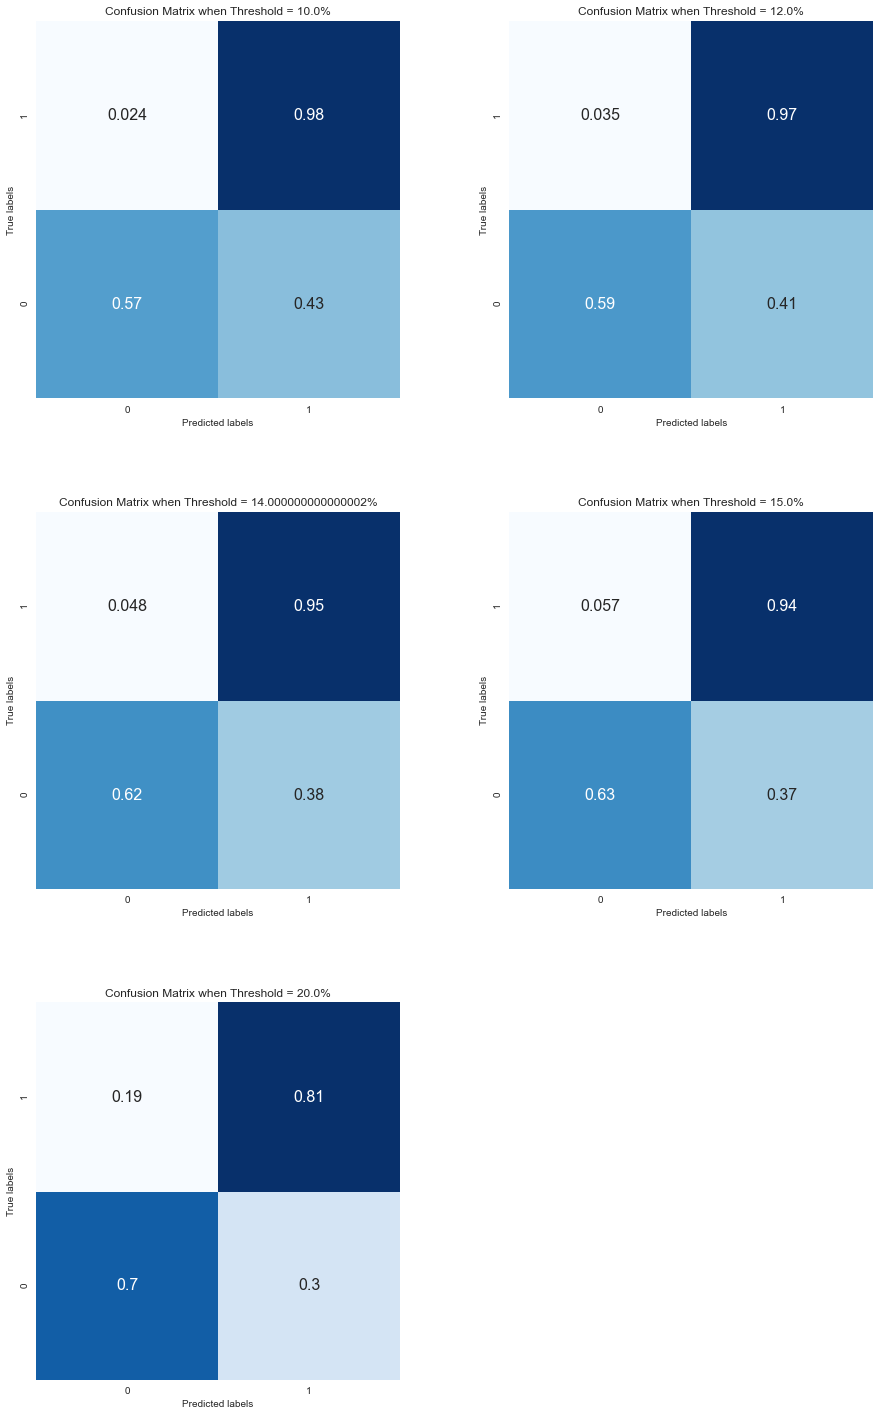

In [134]:
thresholds = [0.1, 0.12, 0.14, 0.15, 0.2, 0.25]
confusion_matrices = []
fig, axes = plt.subplots(figsize=(15,25))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(1, 6):
    ax = plt.subplot(3, 2, i)
    threshold = thresholds[i-1]
    y_pred_proba = logreg.predict_proba(X_train)[:,1]
    y_pred = (y_pred_proba > threshold).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)
    confusion_matrices.append(disp)

    sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix when Threshold = ' + str(threshold*100) + '%');
    ax.set_ylim([0,2])


plt.show()